In [61]:
import pandas as pd
import numpy as np

from scipy import stats
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler, normalize
from math import ceil
import matplotlib.pyplot as plt
import seaborn as sns
#from pandas_profiling import ProfileReport

import warnings
warnings.filterwarnings('ignore')

### 1. Load the dataset

In [112]:
#loading the Wonderful Wines of the World data

data = pd.read_excel(r'C:\Users\Antonio\Desktop\S2\BCwDS\trabalho\data\WonderfulWinesoftheWorld.xlsx') 
data.drop(['Rand'], axis=1)

Custid   Dayswus      Age      Edu      Income  Kidhome  Teenhome  \
0      5325.0   653.000  55.0000  20.0000   78473.000   0.0000    0.0000   
1      3956.0  1041.000  75.0000  18.0000  105087.000   0.0000    0.0000   
2      3681.0   666.000  18.0000  12.0000   27984.000   1.0000    0.0000   
3      2829.0  1049.000  42.0000  16.0000   61748.000   1.0000    1.0000   
4      8788.0   837.000  47.0000  16.0000   65789.000   0.0000    1.0000   
...       ...       ...      ...      ...         ...      ...       ...   
9996   4070.0   596.000  66.0000  15.0000   84714.000   0.0000    0.0000   
9997   7909.0   619.000  18.0000  12.0000   40466.000   0.0000    0.0000   
9998   4158.0  1107.000  33.0000  16.0000   53661.000   1.0000    0.0000   
9999   4914.0   979.000  55.0000  16.0000   94926.000   0.0000    1.0000   
10000     NaN   898.102  47.9273  16.7391   69904.358   0.4188    0.4698   

          Freq   Recency   Monetary  ...  WebVisit  SMRack  LGRack  Humid  \
0      20.0000   18.0000   826.0000  ...    5.0000       0       0      0   
1      36.0000   33.0000  1852.0000  ...    4.0000       0       0      0   
2       4.0000   56.0000    39.0000  ...    8.0000       0       0      0   
3       2.0000   46.0000    37.0000  ...    7.0000       0       0      0   
4       2.0000    3.0000    36.0000  ...    6.0000       0       0      0   
...        ...       ...        ...  ...       ...     ...     ...    ...   
9996   18.0000   45.0000   720.0000  ...    2.0000       0       0      0   
9997    3.0000   65.0000    47.0000  ...    5.0000       0       0      0   
9998    1.0000  368.0000    15.0000  ...    6.0000       0       0      0   
9999   25.0000   28.0000  1148.0000  ...    5.0000       0       0      0   
10000  14.6281   62.4068   622.5552  ...    5.2166     817     696    817   

       Spcork  Bucket  Access  Complain  Mailfriend  Emailfriend  
0           0       0       0         0           0            0  
1           1       0       0         0           0            0  
2           0       0       0         0           0            0  
3           0       0       0         0           1            1  
4           0       0       0         0           0            0  
...       ...     ...     ...       ...         ...          ...  
9996        0       0       0         0           0            0  
9997        0       0       0         0           0            0  
9998        0       0       0         0           0            0  
9999        0       0       0         0           0            0  
10000     682     130    2460       112        1019          511  

[10001 rows x 29 columns]

### 2.Explore the dataset

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Custid       10000 non-null  float64
 1   Dayswus      10001 non-null  float64
 2   Age          10001 non-null  float64
 3   Edu          10001 non-null  float64
 4   Income       10001 non-null  float64
 5   Kidhome      10001 non-null  float64
 6   Teenhome     10001 non-null  float64
 7   Freq         10001 non-null  float64
 8   Recency      10001 non-null  float64
 9   Monetary     10001 non-null  float64
 10  LTV          10001 non-null  float64
 11  Perdeal      10001 non-null  float64
 12  Dryred       10001 non-null  float64
 13  Sweetred     10001 non-null  float64
 14  Drywh        10001 non-null  float64
 15  Sweetwh      10001 non-null  float64
 16  Dessert      10001 non-null  float64
 17  Exotic       10001 non-null  float64
 18  WebPurchase  10001 non-null  float64
 19  WebV

In [64]:
data.head()

Custid  Dayswus   Age   Edu    Income  Kidhome  Teenhome  Freq  Recency  \
0  5325.0    653.0  55.0  20.0   78473.0      0.0       0.0  20.0     18.0   
1  3956.0   1041.0  75.0  18.0  105087.0      0.0       0.0  36.0     33.0   
2  3681.0    666.0  18.0  12.0   27984.0      1.0       0.0   4.0     56.0   
3  2829.0   1049.0  42.0  16.0   61748.0      1.0       1.0   2.0     46.0   
4  8788.0    837.0  47.0  16.0   65789.0      0.0       1.0   2.0      3.0   

   Monetary  ...  SMRack  LGRack  Humid  Spcork  Bucket  Access  Complain  \
0     826.0  ...       0       0      0       0       0       0         0   
1    1852.0  ...       0       0      0       1       0       0         0   
2      39.0  ...       0       0      0       0       0       0         0   
3      37.0  ...       0       0      0       0       0       0         0   
4      36.0  ...       0       0      0       0       0       0         0   

   Mailfriend  Emailfriend      Rand  
0           0            0  0.240092  
1           0            0  0.435944  
2           0            0  0.350584  
3           1            1  0.594082  
4           0            0  0.782248  

[5 rows x 30 columns]

In [65]:
len(data.Custid.unique())

10001

In [51]:
# Summary statistics for all variables
data.describe(include='all').transpose()

count          mean           std           min           25%  \
Custid       10000.0   6000.500000   2886.895680   1001.000000   3500.750000   
Dayswus      10001.0    898.102000    202.482664    550.000000    724.000000   
Age          10001.0     47.927300     17.301856     18.000000     33.000000   
Edu          10001.0     16.739100      1.876281     12.000000     15.000000   
Income       10001.0  69904.358000  27610.852665  10000.000000  47646.000000   
Kidhome      10001.0      0.418800      0.493363      0.000000      0.000000   
Teenhome     10001.0      0.469800      0.499087      0.000000      0.000000   
Freq         10001.0     14.628100     11.968475      1.000000      4.000000   
Recency      10001.0     62.406800     69.870762      0.000000     26.000000   
Monetary     10001.0    622.555200    647.102966      6.000000     63.000000   
LTV          10001.0    209.071200    291.971441   -178.000000     -2.000000   
Perdeal      10001.0     32.397200     27.895699      0.000000      6.000000   
Dryred       10001.0     50.382700     23.452643      1.000000     32.000000   
Sweetred     10001.0      7.054500      7.866151      0.000000      2.000000   
Drywh        10001.0     28.521300     12.583328      1.000000     19.000000   
Sweetwh      10001.0      7.069800      8.014682      0.000000      2.000000   
Dessert      10001.0      6.947400      7.879152      0.000000      2.000000   
Exotic       10001.0     16.546600     17.246809      0.000000      4.000000   
WebPurchase  10001.0     42.376200     18.521136      4.000000     28.000000   
WebVisit     10001.0      5.216600      2.330340      0.000000      3.000000   
SMRack       10001.0      0.163384      8.173365      0.000000      0.000000   
LGRack       10001.0      0.139186      6.963607      0.000000      0.000000   
Humid        10001.0      0.163384      8.173365      0.000000      0.000000   
Spcork       10001.0      0.136386      6.823635      0.000000      0.000000   
Bucket       10001.0      0.025997      1.304731      0.000000      0.000000   
Access       10001.0      0.491951     24.602219      0.000000      0.000000   
Complain     10001.0      0.022398      1.124766      0.000000      0.000000   
Mailfriend   10001.0      0.203780     10.192962      0.000000      0.000000   
Emailfriend  10001.0      0.102190      5.113977      0.000000      0.000000   
Rand         10000.0      0.502157      0.290068      0.000266      0.249537   

                      50%           75%            max  
Custid        6000.500000   8500.250000   11000.000000  
Dayswus        894.000000   1074.000000    1250.000000  
Age             48.000000     63.000000      78.000000  
Edu             17.000000     18.000000      20.000000  
Income       70009.000000  92147.000000  140628.000000  
Kidhome          0.000000      1.000000       1.000000  
Teenhome         0.000000      1.000000       1.000000  
Freq            12.000000     24.000000      56.000000  
Recency         52.000000     78.000000     549.000000  
Monetary       383.000000   1077.000000    3052.000000  
LTV             57.000000    364.000000    1791.000000  
Perdeal         25.000000     56.000000      97.000000  
Dryred          51.000000     69.000000      99.000000  
Sweetred         4.000000     10.000000      75.000000  
Drywh           28.000000     37.000000      74.000000  
Sweetwh          4.000000     10.000000      62.000000  
Dessert          4.000000      9.000000      77.000000  
Exotic          10.000000     23.000000      96.000000  
WebPurchase     45.000000     57.000000      88.000000  
WebVisit         6.000000      7.000000      10.000000  
SMRack           0.000000      0.000000     817.000000  
LGRack           0.000000      0.000000     696.000000  
Humid            0.000000      0.000000     817.000000  
Spcork           0.000000      0.000000     682.000000  
Bucket           0.000000      0.000000     130.000000  
Access           0.000000      0.000000    2460.0000

In [78]:
non_metric_features = ['Kidhome','Teenhome','SMRack','LGRack', 'Humid', 'Spcork', 'Bucket', 'Access', 'Complain', 'Mailfriend','Emailfriend']
metric_features = data.columns.drop(non_metric_features).to_list()
metric_features.remove('Custid')
metric_features.remove('Rand')

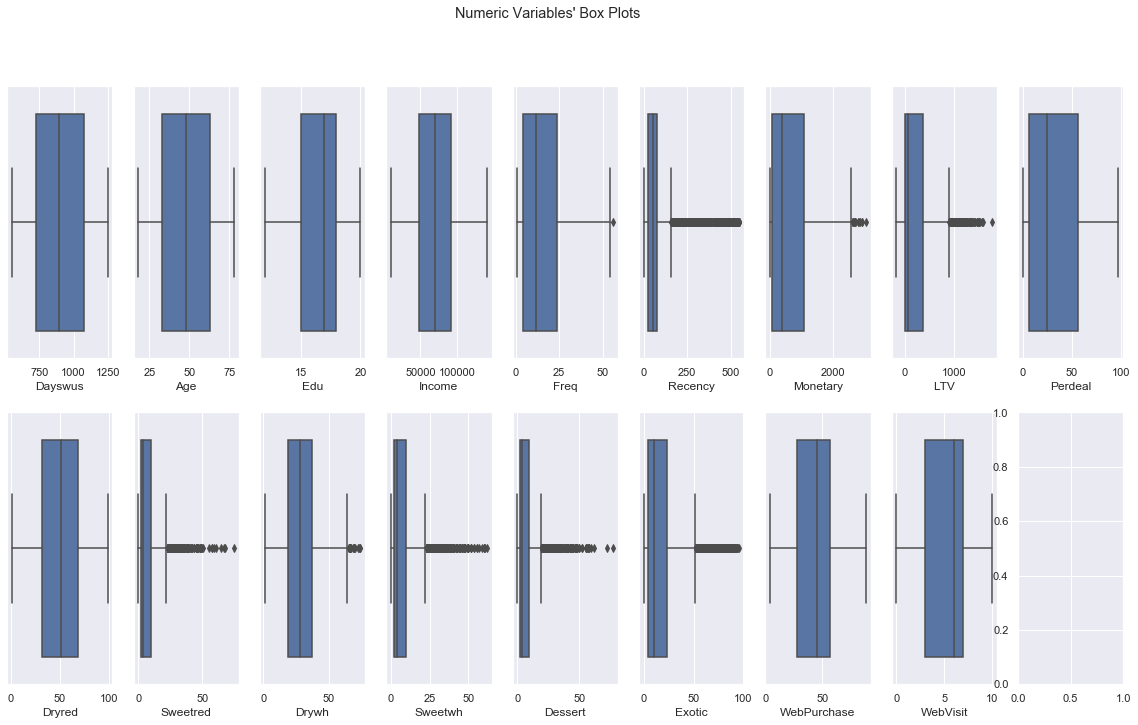

In [80]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=data[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

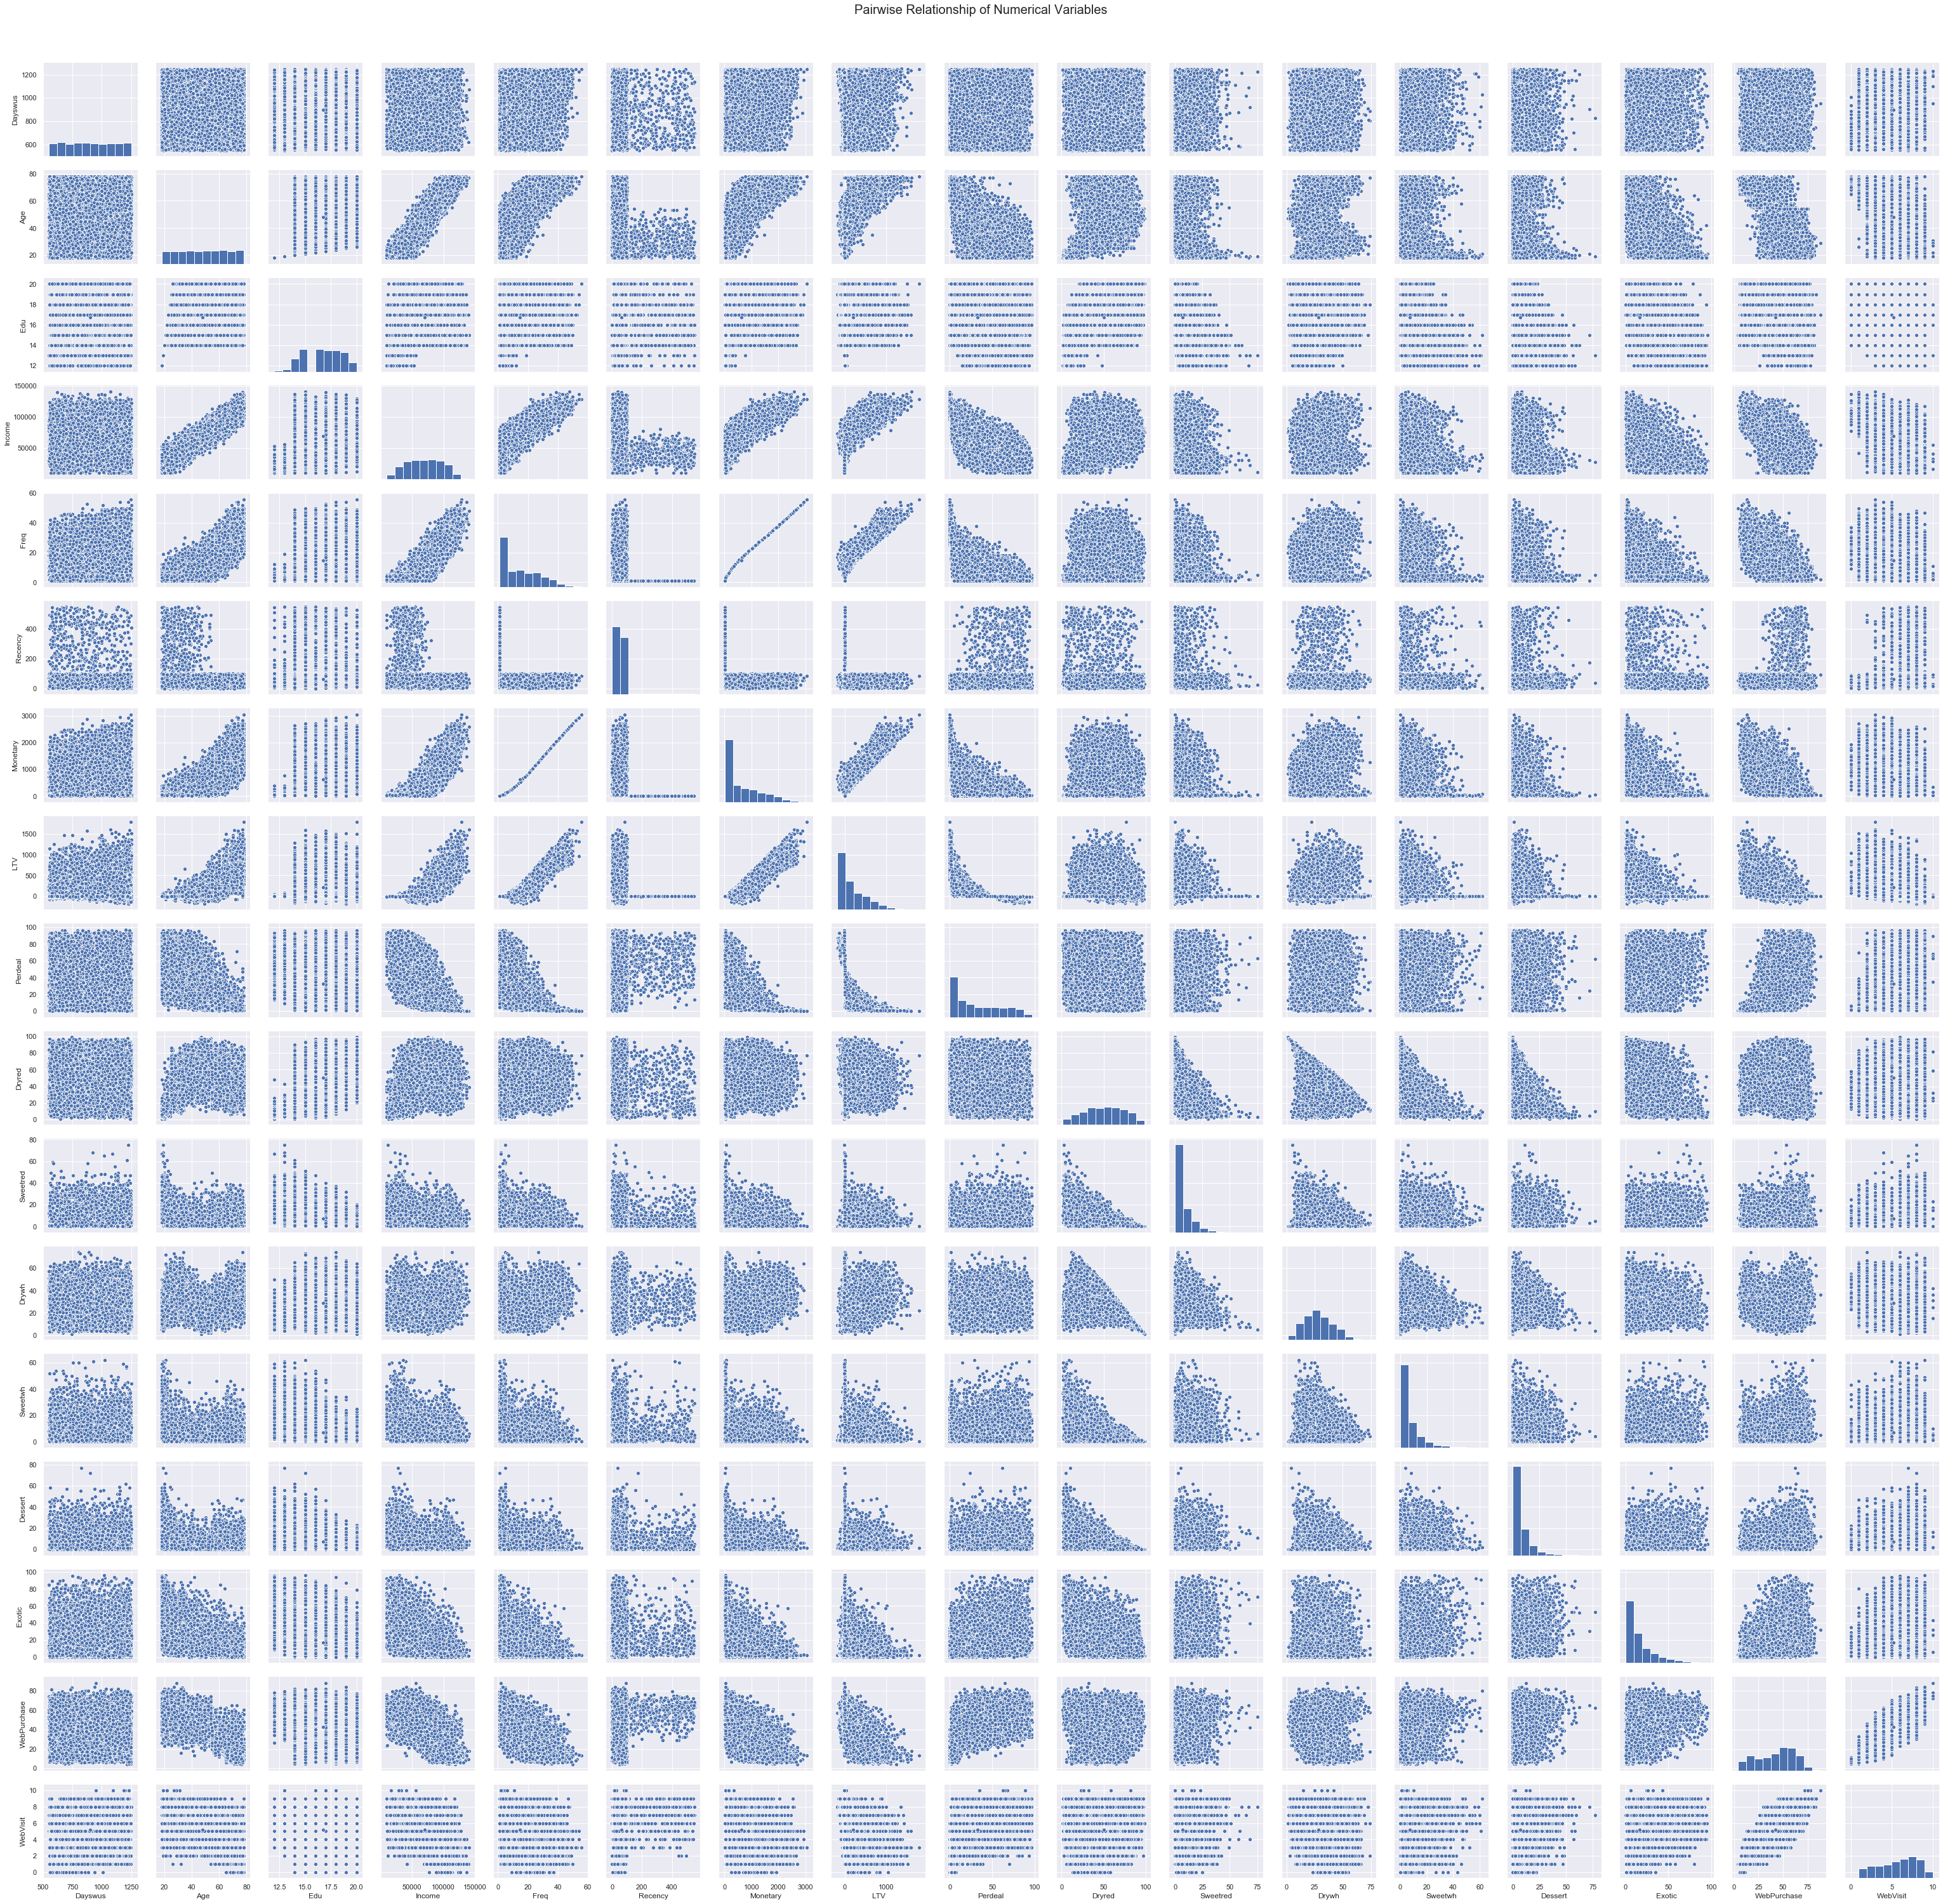

In [129]:
# Pairwise Relationship of Numerical Variables
sns.set()

# Setting pairplot
sns.pairplot(data[metric_features], diag_kind="hist")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

plt.show()

### 3.Coherence Checks

In [ ]:
data[data["Age"]<18.0]

In [ ]:
data[data["Freq"]==0]

### 4.Data Preparation

#### 4.1 Select data

In [113]:
# Preserving the original df without variables CustomerId and Rand
data_clean = data.iloc[:,1:29].copy()

#### 4.2 Outliers

##### 4.2.1 Manually-Univariate outliers

After visualizing the Boxplot of the numerical variables, it can be seen numerous outliers in 'LTV','Sweetred','Monetary','Dessert'.Therefore, the team decided to eliminate manually 

In [114]:
# LTV
data_clean['LTV'].sort_values(ascending=False)

4231    1791.0
65      1608.0
9551    1588.0
7145    1583.0
230     1549.0
         ...  
5770    -147.0
3567    -147.0
66      -160.0
3568    -168.0
265     -178.0
Name: LTV, Length: 10001, dtype: float64

In [115]:
# LTV-Removing outliers from the dataset
data_clean = data_clean.loc[data_clean['LTV']!=1791.0, :]

In [116]:
# Sweetred
data_clean['Sweetred'].sort_values(ascending=False)

6233    75.0
4986    68.0
5127    67.0
6923    65.0
7253    61.0
        ... 
5388     0.0
4128     0.0
8824     0.0
8822     0.0
4553     0.0
Name: Sweetred, Length: 10000, dtype: float64

In [117]:
# Sweetred-Removing outliers from the dataset
data_clean = data_clean.loc[data_clean['Sweetred']<60, :]

In [118]:
# Monetary
data_clean['Monetary'].sort_values(ascending=False)

4054    2938.0
9554    2936.0
7145    2878.0
9444    2823.0
7152    2821.0
         ...  
6127       8.0
631        8.0
9166       7.0
3058       7.0
6672       6.0
Name: Monetary, Length: 9995, dtype: float64

In [105]:
#Monetary-Removing outliers from the dataset
data_clean = data_clean.loc[data_clean['Monetary']<2936.0, :]

In [107]:
# Dessert
data_clean['Dessert'].sort_values(ascending=False)

7019    77.0
8335    72.0
6353    62.0
7077    59.0
6387    58.0
        ... 
5522     0.0
730      0.0
2214     0.0
728      0.0
8669     0.0
Name: Dessert, Length: 9993, dtype: float64

In [121]:
#Dessert-Removing outliers from the dataset
data_clean = data_clean.loc[data_clean['Dessert']<70, :]

In [124]:
#reset index
data_clean.reset_index(drop=True)

Dayswus      Age      Edu      Income  Kidhome  Teenhome     Freq  \
0      653.000  55.0000  20.0000   78473.000   0.0000    0.0000  20.0000   
1     1041.000  75.0000  18.0000  105087.000   0.0000    0.0000  36.0000   
2      666.000  18.0000  12.0000   27984.000   1.0000    0.0000   4.0000   
3     1049.000  42.0000  16.0000   61748.000   1.0000    1.0000   2.0000   
4      837.000  47.0000  16.0000   65789.000   0.0000    1.0000   2.0000   
...        ...      ...      ...         ...      ...       ...      ...   
9988   596.000  66.0000  15.0000   84714.000   0.0000    0.0000  18.0000   
9989   619.000  18.0000  12.0000   40466.000   0.0000    0.0000   3.0000   
9990  1107.000  33.0000  16.0000   53661.000   1.0000    0.0000   1.0000   
9991   979.000  55.0000  16.0000   94926.000   0.0000    1.0000  25.0000   
9992   898.102  47.9273  16.7391   69904.358   0.4188    0.4698  14.6281   

       Recency   Monetary       LTV  ...  WebVisit  SMRack  LGRack  Humid  \
0      18.0000   826.0000  445.0000  ...    5.0000       0       0      0   
1      33.0000  1852.0000  539.0000  ...    4.0000       0       0      0   
2      56.0000    39.0000   -7.0000  ...    8.0000       0       0      0   
3      46.0000    37.0000   -6.0000  ...    7.0000       0       0      0   
4       3.0000    36.0000    4.0000  ...    6.0000       0       0      0   
...        ...        ...       ...  ...       ...     ...     ...    ...   
9988   45.0000   720.0000  391.0000  ...    2.0000       0       0      0   
9989   65.0000    47.0000    5.0000  ...    5.0000       0       0      0   
9990  368.0000    15.0000    2.0000  ...    6.0000       0       0      0   
9991   28.0000  1148.0000  293.0000  ...    5.0000       0       0      0   
9992   62.4068   622.5552  209.0712  ...    5.2166     817     696    817   

      Spcork  Bucket  Access  Complain  Mailfriend  Emailfriend  
0          0       0       0         0           0            0  
1          1       0       0         0           0            0  
2          0       0       0         0           0            0  
3          0       0       0         0           1            1  
4          0       0       0         0           0            0  
...      ...     ...     ...       ...         ...          ...  
9988       0       0       0         0           0            0  
9989       0       0       0         0           0            0  
9990       0       0       0         0           0            0  
9991       0       0       0         0           0            0  
9992     682     130    2460       112        1019          511  

[9993 rows x 28 columns]

In [143]:
data_clean[metric_features]



Dayswus      Age      Edu      Income     Freq   Recency   Monetary  \
0       653.000  55.0000  20.0000   78473.000  20.0000   18.0000   826.0000   
1      1041.000  75.0000  18.0000  105087.000  36.0000   33.0000  1852.0000   
2       666.000  18.0000  12.0000   27984.000   4.0000   56.0000    39.0000   
3      1049.000  42.0000  16.0000   61748.000   2.0000   46.0000    37.0000   
4       837.000  47.0000  16.0000   65789.000   2.0000    3.0000    36.0000   
...         ...      ...      ...         ...      ...       ...        ...   
9996    596.000  66.0000  15.0000   84714.000  18.0000   45.0000   720.0000   
9997    619.000  18.0000  12.0000   40466.000   3.0000   65.0000    47.0000   
9998   1107.000  33.0000  16.0000   53661.000   1.0000  368.0000    15.0000   
9999    979.000  55.0000  16.0000   94926.000  25.0000   28.0000  1148.0000   
10000   898.102  47.9273  16.7391   69904.358  14.6281   62.4068   622.5552   

            LTV  Perdeal   Dryred  Sweetred    Drywh  Sweetwh  Dessert  \
0      445.0000   7.0000  67.0000    4.0000  26.0000   2.0000   1.0000   
1      539.0000   2.0000  49.0000    0.0000  46.0000   1.0000   3.0000   
2       -7.0000  88.0000   4.0000   29.0000  14.0000  32.0000  21.0000   
3       -6.0000  70.0000  86.0000    1.0000  11.0000   1.0000   1.0000   
4        4.0000  35.0000  85.0000    0.0000  12.0000   2.0000   1.0000   
...         ...      ...      ...       ...      ...      ...      ...   
9996   391.0000   5.0000  30.0000   12.0000  36.0000  10.0000  12.0000   
9997     5.0000  23.0000   6.0000   24.0000  10.0000  38.0000  22.0000   
9998     2.0000  35.0000  18.0000   13.0000  45.0000  11.0000  13.0000   
9999   293.0000   7.0000  63.0000   10.0000  13.0000  11.0000   3.0000   
10000  209.0712  32.3972  50.3827    7.0545  28.5213   7.0698   6.9474   

        Exotic  WebPurchase  WebVisit  
0       1.0000      36.0000    5.0000  
1       0.0000      20.0000    4.0000  
2      48.0000      60.0000    8.0000  
3      55.0000      59.0000    7.0000  
4      28.0000      63.0000    6.0000  
...        ...          ...       ...  
9996   13.0000      18.0000    2.0000  
9997   41.0000      58.0000    5.0000  
9998   13.0000      60.0000    6.0000  
9999    4.0000      34.0000    5.0000  
10000  16.5466      42.3762    5.2166  

[9993 rows x 17 columns]

##### 4.2.2 IQR

In [141]:
#IQR

q25 = data_clean.quantile(.25)
q75 = data_clean.quantile(.75)
iqr = (q75 - q25)

upper_lim = q75 + 1.5 * iqr
lower_lim = q25 - 1.5 * iqr

columns = data_clean.columns
filter1 = []
for column in columns:
    llim = lower_lim[column]
    ulim = upper_lim[column]
    filter1.append(data_clean[column].between(llim, ulim, inclusive=True))

filter1 = pd.Series(np.all(filter1, 0))
do1 = data_clean.loc[filter1]
print('Percentage of data kept after removing outliers:', np.round(do1.shape[0] / data_clean.shape[0], 4))

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [127]:
#Z-Score

z_scores = stats.zscore(data_clean)
abs_z_scores = np.abs(z_scores)
filter2 = (abs_z_scores < 3).all(axis=1)
filter2 = pd.Series(filter2)
do2 = data_clean[filter2]
print('Percentage of data kept after removing outliers:', np.round(do2.shape[0] / data_clean.shape[0], 4))

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [ ]:
#Combining IQR and Z-Score methods

len(data_clean[(filter2 | filter1)])/len(data_clean)

In [ ]:
The z-score alone was the one that detected the biggest amount of outliers.

In [ ]:
dataco = do2.copy()
outliers = data_clean[filter2 == False]

#### 4.3 Normalization

In [131]:
#Normalize
names = dataco.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(dataco)
scaled_df = pd.DataFrame(scaled_df, columns=names)
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df,columns=names) 

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### 4.4 Redundacy

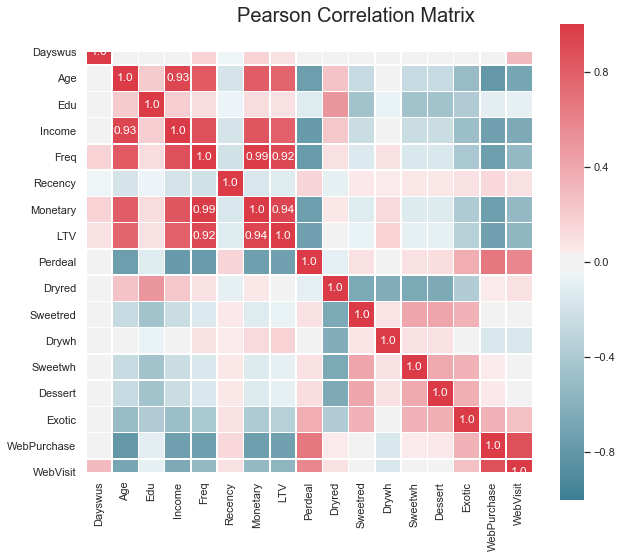

In [140]:
# Prepare figure
fig = plt.figure(figsize=(10, 8))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(data[metric_features].corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.9| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.9
annot = np.where(mask_annot, corr.values, np.full(corr.shape,""))

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot,cmap=sns.diverging_palette(220, 10, as_cmap=True),fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Pearson Correlation Matrix", fontsize=20)

plt.show()

Eliminate 

In [ ]:
normalized_df

In [ ]:
### dataframe to csv file
normalized_df.to_csv('Cleaned_data.csv')